# Tensorflow , Structured Data , Binary Classification

### Install and Import Libraries

In [ ]:
# pip install pycaret

In [46]:
# few libraries to ggrab
import tensorflow as tf
import numpy as np
import pandas as pd
from sklearn.metrics import classification_report
from pycaret.classification import setup,get_config

### Read the data

In [47]:
# read the data 
df = pd.read_csv("https://raw.githubusercontent.com/pycaret/pycaret/master/datasets/electrical_grid.csv")
df.head()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stabf
0,2.95906,3.07989,8.38103,9.78075,3.76308,-0.78260,-1.25739,-1.72309,0.65046,0.85958,0.88744,0.95803,unstable
1,9.30410,4.90252,3.04754,1.36936,5.06781,-1.94006,-1.87274,-1.25501,0.41344,0.86241,0.56214,0.78176,stable
2,8.97171,8.84843,3.04648,1.21452,3.40516,-1.20746,-1.27721,-0.92049,0.16304,0.76669,0.83944,0.10985,unstable
3,0.71641,7.66960,4.48664,2.34056,3.96379,-1.02747,-1.93894,-0.99737,0.44621,0.97674,0.92938,0.36272,unstable
4,3.13411,7.60877,4.94376,9.85757,3.52581,-1.12553,-1.84597,-0.55431,0.79711,0.45545,0.65695,0.82092,unstable


### Explore the data

In [ ]:
df.describe(include='all')

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stabf
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,unstable
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6380
mean,5.250000,5.250001,5.250004,5.249997,3.750000,-1.250000,-1.250000,-1.250000,0.525000,0.525000,0.525000,0.525000,NaN
std,2.742548,2.742549,2.742549,2.742556,0.752160,0.433035,0.433035,0.433035,0.274256,0.274255,0.274255,0.274255,NaN
min,0.500793,0.500141,0.500788,0.500473,1.582590,-1.999891,-1.999945,-1.999926,0.050009,0.050053,0.050054,0.050028,NaN
25%,2.874892,2.875140,2.875522,2.874950,3.218300,-1.624901,-1.625025,-1.624960,0.287521,0.287552,0.287514,0.287494,NaN
50%,5.250004,5.249981,5.249979,5.249734,3.751025,-1.249966,-1.249974,-1.250007,0.525009,0.525003,0.525015,0.525002,NaN
75%,7.624690,7.624893,7.624948,7.624838,4.282420,-0.874977,-0.875043,-0.875065,0.762435,0.762490,0.762440,0.762433,NaN


### Preprocess the Data

In [48]:
# setup forpreprocessing
s = setup(data=df,target='stabf',normalize=True,session_id=123,silent=True,verbose=False)

In [49]:
# grab the preprocessed data
X_train,y_train,X_test,y_test = get_config("X_train"),get_config("y_train"),get_config("X_test"),get_config("y_test")

In [50]:
# have a look at it 
pd.options.display.float_format = '{:.5f}'.format
X_train.describe()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4
count,6999.00000,6999.00000,6999.00000,6999.00000,6999.00000,6999.00000,6999.00000,6999.00000,6999.00000,6999.00000,6999.00000,6999.00000
mean,-0.00000,0.00000,0.00000,0.00000,-0.00000,-0.00000,0.00000,-0.00000,-0.00000,0.00000,-0.00000,0.00000
std,1.00007,1.00007,1.00007,1.00007,1.00007,1.00007,1.00007,1.00007,1.00007,1.00007,1.00007,1.00007
min,-1.73210,-1.73667,-1.74222,-1.72767,-2.86897,-1.73381,-1.73315,-1.72920,-1.74555,-1.74388,-1.71763,-1.73951
25%,-0.86781,-0.86119,-0.86214,-0.86763,-0.70640,-0.86811,-0.86957,-0.86456,-0.86426,-0.86434,-0.85970,-0.86611
50%,-0.00266,0.00816,0.00338,0.00172,0.00331,0.00678,0.00388,-0.00296,0.00246,0.01100,-0.00559,0.00854
75%,0.86699,0.86317,0.85963,0.86183,0.70970,0.85679,0.86019,0.86785,0.86950,0.86277,0.86142,0.86094
max,1.72857,1.72708,1.73011,1.73145,2.79412,1.73455,1.73268,1.73733,1.73413,1.72326,1.74382,1.72665


### Build the model

In [ ]:
# have alook at tf.keras
# Keras is an open-source software library that provides a Python interface for artificial neural networks


In [ ]:
# set the random seed
tf.random.set_seed(123)

In [ ]:
# get the model class
model_class = tf.keras.Model

In [ ]:
# get input layer
input_layer_function = tf.keras.layers.Input

In [51]:
# get hidden layer
hidden_layer_function = tf.keras.layers.Dense

In [52]:
# build the model structure
visible = input_layer_function(shape=(X_train.shape[1],),name="input") #shape
hidden_layer_1 = hidden_layer_function(units=15,activation='relu',name="hidden_layer_1") (visible)
hidden_layer_2 = hidden_layer_function(units=5, activation='relu',name="hidden_layer_2") (hidden_layer_1) 
hidden_layer_3 = hidden_layer_function(units=10, activation='relu',name="hidden_layer_3") (hidden_layer_2) 
output_layer = hidden_layer_function(units=1,activation='sigmoid',name="output_layer") (hidden_layer_3)

# put the information into the model
model_structure = model_class(inputs=visible, outputs=output_layer,name='BinaryClass_StructuredData_Model')

In [53]:
# lets look at our model
model_structure.summary()

Model: "BinaryClass_StructuredData_Model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, 12)]              0         
                                                                 
 hidden_layer_1 (Dense)      (None, 15)                195       
                                                                 
 hidden_layer_2 (Dense)      (None, 5)                 80        
                                                                 
 hidden_layer_3 (Dense)      (None, 10)                60        
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 346
Trainable params: 346
Non-trainable params: 0
_________________________________________________________________


In [54]:
# why first hidden layer has 195 Parameters ?

# why second hidden layer has 55 Parameters ?


195

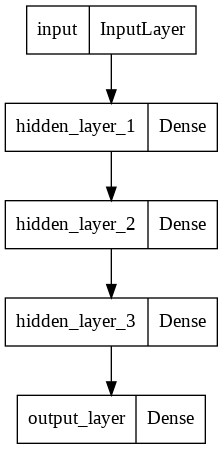

In [56]:
# extra utility to see the plot of the model
from tensorflow.keras.utils import plot_model
plot_model(model_structure, to_file='multilayer_perceptron_graph.png')

### Train the Model

In [57]:
# First we need to selsct the OPTIMIZER, LEARNING RATE & the LOSS FUNCTION
# Simply call the compile function 
tf.random.set_seed(123)
model_structure.compile(
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.01),
     loss=tf.keras.losses.BinaryCrossentropy(),
)

In [64]:
# Now do the training
trained_model= model_structure.fit(x=X_train,y=y_train,batch_size=32,epochs=5)

Epoch 1/5
219/219 [==============================] - 1s 6ms/step - loss: 0.2000
Epoch 2/5
219/219 [==============================] - 1s 5ms/step - loss: 0.1908
Epoch 3/5
219/219 [==============================] - 1s 5ms/step - loss: 0.1834
Epoch 4/5
219/219 [==============================] - 1s 5ms/step - loss: 0.1758
Epoch 5/5
219/219 [==============================] - 1s 5ms/step - loss: 0.1673


In [69]:
# check the weights of a layer
# trained_model.model.layers[1].weights

In [71]:
# training with Validation
model_structure.fit(x=X_train,y=y_train,batch_size=32,epochs=4,validation_split=.10)


Epoch 1/4
197/197 [==============================] - 2s 7ms/step - loss: 0.1565 - val_loss: 0.1853
Epoch 2/4
197/197 [==============================] - 1s 6ms/step - loss: 0.1509 - val_loss: 0.1796
Epoch 3/4
197/197 [==============================] - 1s 6ms/step - loss: 0.1526 - val_loss: 0.1818
Epoch 4/4
197/197 [==============================] - 1s 6ms/step - loss: 0.1493 - val_loss: 0.1713


In [72]:
# an example , how to reset the training and start again...
tf.random.set_seed(123)
# clone any model you want, this copies the structure , but not the parameters
model_cloned = tf.keras.models.clone_model(model_structure)
# complie it
model_cloned.compile(
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.01),
     loss=tf.keras.losses.BinaryCrossentropy(),
)
# train it 
model_cloned.fit(x=X_train,y=y_train,batch_size=32,epochs=5,validation_split=.10)

Epoch 1/5
197/197 [==============================] - 2s 5ms/step - loss: 0.3913 - val_loss: 0.3008
Epoch 2/5
197/197 [==============================] - 1s 5ms/step - loss: 0.2533 - val_loss: 0.2270
Epoch 3/5
197/197 [==============================] - 1s 5ms/step - loss: 0.2092 - val_loss: 0.2179
Epoch 4/5
197/197 [==============================] - 1s 5ms/step - loss: 0.1890 - val_loss: 0.2356
Epoch 5/5
197/197 [==============================] - 1s 5ms/step - loss: 0.1767 - val_loss: 0.1917


### Make Predictions

In [73]:
# Train Data
# model provides probabilities
# define a threshold 
threshold = 0.50
# get prediction 
train_prob = model_structure.predict(X_train)
y_train_hat =  np.where(train_prob.reshape(-1,) < threshold ,0,1)
print(classification_report(y_train_hat,y_train))

              precision    recall  f1-score   support

           0       0.90      0.93      0.92      2413
           1       0.96      0.95      0.95      4586

    accuracy                           0.94      6999
   macro avg       0.93      0.94      0.93      6999
weighted avg       0.94      0.94      0.94      6999



In [74]:
# Test Data
# get prediction 
test_prob = model_structure.predict(X_test)
y_test_hat =  np.where(test_prob.reshape(-1,) < threshold ,0,1)
print(classification_report(y_test_hat,y_test))

              precision    recall  f1-score   support

           0       0.87      0.91      0.89      1078
           1       0.95      0.92      0.94      1923

    accuracy                           0.92      3001
   macro avg       0.91      0.92      0.91      3001
weighted avg       0.92      0.92      0.92      3001



### Save the model

In [75]:
# save the entire model
model_structure.save("Binary_Class_SD_model")

INFO:tensorflow:Assets written to: Binary_Class_SD_model/assets


In [76]:
# load the saved model
new_model = tf.keras.models.load_model('Binary_Class_SD_model')

In [77]:
# check your parameters
new_model.weights[0][:1]

<tf.Tensor: shape=(1, 15), dtype=float32, numpy=
array([[ 0.5060247 ,  0.36938557,  0.57382715, -0.5066362 ,  0.53372127,
         1.0951686 , -0.24921484, -0.04579435,  0.3810073 , -2.9811864 ,
        -1.1880002 , -0.04339179,  0.11475826,  0.3556057 ,  0.29846635]],
      dtype=float32)>

In [78]:
# check the model summary
new_model.summary()

Model: "BinaryClass_StructuredData_Model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, 12)]              0         
                                                                 
 hidden_layer_1 (Dense)      (None, 15)                195       
                                                                 
 hidden_layer_2 (Dense)      (None, 5)                 80        
                                                                 
 hidden_layer_3 (Dense)      (None, 10)                60        
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 346
Trainable params: 346
Non-trainable params: 0
_________________________________________________________________
